# Veamos los datos para decidir tamaño de los crops, anchor boxes, etc

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pathlib import Path
from detection_helper import create_DF
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import pickle
with open("data.pkl","rb") as f:
    (df_train, df_val, train_files, val_files, classes_idx, cant_classes, classes) = pickle.load(f)

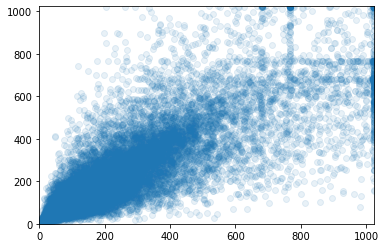

In [119]:
plt.scatter(df_train["delta_x"],df_train["delta_y"], alpha=0.1)
plt.xlim([0,1024])
plt.ylim([0,1024])
plt.show()

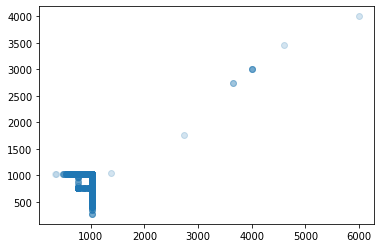

In [4]:
plt.scatter(df_train["height"],df_train["width"], alpha=0.1)
plt.show()

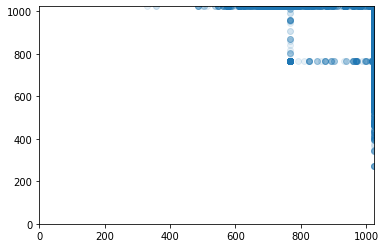

In [5]:
plt.scatter(df_train["height"],df_train["width"], alpha=0.1)
plt.xlim([0,1024])
plt.ylim([0,1024])
plt.show()

# Vamos a usar crops de 512 x 512.
